In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("wdbc.csv", header=None)

df_raw

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
device = "cpu"

In [4]:
y = pd.get_dummies(df_raw.iloc[:,1:2])

y = torch.Tensor(y.values).to(device)

y

tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]], device='cuda:0')

In [5]:
x = df_raw.iloc[:,2:]

x = (x - x.min()) / (x.max() - x.min())

x = torch.Tensor(x.values).to(device)

x

tensor([[0.5210, 0.0227, 0.5460,  ..., 0.9120, 0.5985, 0.4189],
        [0.6431, 0.2726, 0.6158,  ..., 0.6392, 0.2336, 0.2229],
        [0.6015, 0.3903, 0.5957,  ..., 0.8351, 0.4037, 0.2134],
        ...,
        [0.4553, 0.6212, 0.4458,  ..., 0.4873, 0.1287, 0.1519],
        [0.6446, 0.6635, 0.6655,  ..., 0.9107, 0.4971, 0.4523],
        [0.0369, 0.5015, 0.0285,  ..., 0.0000, 0.2574, 0.1007]],
       device='cuda:0')

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 10000) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(10000, 10)
        
        self.multiple_layers = nn.Sequential(
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
        )
        
        self.output_layer = nn.Linear(10, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        x = self.multiple_layers(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [7]:
model = NeuralNetwork(30, 2).to(device)

# Test structure of model
predictions = model.forward(x)

predictions

tensor([[0.5457, 0.4928],
        [0.5457, 0.4928],
        [0.5457, 0.4928],
        ...,
        [0.5457, 0.4928],
        [0.5457, 0.4928],
        [0.5457, 0.4928]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [8]:
learning_rate = 0.00001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [9]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [10]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset(x=x, y=y)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "model.pth")

Epoch: 0


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 209.46it/s, loss=0.265]


Ave Loss: 0.24433197028804243
Epoch: 1


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 215.24it/s, loss=0.265]


Ave Loss: 0.24415228777287298
Epoch: 2


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 225.79it/s, loss=0.266]


Ave Loss: 0.24399210499566898
Epoch: 3


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 277.63it/s, loss=0.266]


Ave Loss: 0.2438359052727097
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 215.74it/s, loss=0.266]


Ave Loss: 0.24368251389578768
Epoch: 5


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 179.30it/s, loss=0.267]


Ave Loss: 0.24353162630608208
Epoch: 6


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 192.51it/s, loss=0.267]


Ave Loss: 0.24338309545266001
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 196.16it/s, loss=0.268]


Ave Loss: 0.2432368363727603
Epoch: 8


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 187.52it/s, loss=0.268]


Ave Loss: 0.24309279495163968
Epoch: 9


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 239.04it/s, loss=0.268]


Ave Loss: 0.24295091903523394
Epoch: 10


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 210.35it/s, loss=0.269]


Ave Loss: 0.24281117424630283
Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 208.72it/s, loss=0.269]


Ave Loss: 0.2426735054244075
Epoch: 12


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 279.72it/s, loss=0.27]


Ave Loss: 0.24253787688518824
Epoch: 13


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 221.38it/s, loss=0.27]


Ave Loss: 0.24240427189751676
Epoch: 14


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 238.03it/s, loss=0.27]


Ave Loss: 0.24227264549648553
Epoch: 15


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 262.88it/s, loss=0.271]


Ave Loss: 0.2421429759839125
Epoch: 16


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 255.25it/s, loss=0.271]


Ave Loss: 0.24201523355747523
Epoch: 17


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 274.77it/s, loss=0.272]


Ave Loss: 0.24188937469009766
Epoch: 18


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 269.74it/s, loss=0.272]


Ave Loss: 0.24176537350081562
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 265.21it/s, loss=0.272]


Ave Loss: 0.24164321744128278
Epoch: 20


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 258.18it/s, loss=0.273]


Ave Loss: 0.2415228703042917
Epoch: 21


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 277.19it/s, loss=0.273]


Ave Loss: 0.2414043012418245
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 262.48it/s, loss=0.274]


Ave Loss: 0.24128748698715577
Epoch: 23


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 263.05it/s, loss=0.274]


Ave Loss: 0.24117241185485272
Epoch: 24


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 286.74it/s, loss=0.274]


Ave Loss: 0.2410590385920123
Epoch: 25


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 266.25it/s, loss=0.275]


Ave Loss: 0.24094733948770322
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 256.75it/s, loss=0.275]


Ave Loss: 0.24083729964076428
Epoch: 27


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 274.78it/s, loss=0.275]


Ave Loss: 0.2407289020586432
Epoch: 28


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 260.11it/s, loss=0.276]


Ave Loss: 0.24062210099216094
Epoch: 29


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 273.14it/s, loss=0.276]


Ave Loss: 0.24051689931698012
Epoch: 30


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 259.28it/s, loss=0.277]


Ave Loss: 0.24041324880039483
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 259.14it/s, loss=0.277]


Ave Loss: 0.240311151664508
Epoch: 32


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 268.50it/s, loss=0.277]


Ave Loss: 0.24021056987214506
Epoch: 33


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 252.00it/s, loss=0.278]


Ave Loss: 0.2401114823786836
Epoch: 34


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 274.73it/s, loss=0.278]


Ave Loss: 0.240013881733543
Epoch: 35


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 286.30it/s, loss=0.278]


Ave Loss: 0.23991774009508
Epoch: 36


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 265.84it/s, loss=0.279]


Ave Loss: 0.23982302334747815
Epoch: 37


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 271.49it/s, loss=0.279]


Ave Loss: 0.2397297339742644
Epoch: 38


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 271.46it/s, loss=0.279]


Ave Loss: 0.23963783576823117
Epoch: 39


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 257.57it/s, loss=0.28]


Ave Loss: 0.23954731892598302
Epoch: 40


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 237.45it/s, loss=0.28]


Ave Loss: 0.23945815808940352
Epoch: 41


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 262.19it/s, loss=0.281]


Ave Loss: 0.2393703294689195
Epoch: 42


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 267.49it/s, loss=0.281]


Ave Loss: 0.2392838186862176
Epoch: 43


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 224.59it/s, loss=0.281]


Ave Loss: 0.23919860443525148
Epoch: 44


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 256.52it/s, loss=0.282]


Ave Loss: 0.23911467429838681
Epoch: 45


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 264.96it/s, loss=0.282]


Ave Loss: 0.23903200683886544
Epoch: 46


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 271.15it/s, loss=0.282]


Ave Loss: 0.23895057290792465
Epoch: 47


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 272.77it/s, loss=0.283]


Ave Loss: 0.2388703662313913
Epoch: 48


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 268.25it/s, loss=0.283]


Ave Loss: 0.23879135739907884
Epoch: 49


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 254.42it/s, loss=0.283]


Ave Loss: 0.23871352981057084
Epoch: 50


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 267.87it/s, loss=0.284]


Ave Loss: 0.23863686555833147
Epoch: 51


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 265.78it/s, loss=0.284]


Ave Loss: 0.23856128778373986
Epoch: 52


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 247.72it/s, loss=0.284]


Ave Loss: 0.23848685674500048
Epoch: 53


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 284.19it/s, loss=0.285]


Ave Loss: 0.23841356146231032
Epoch: 54


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 236.68it/s, loss=0.285]


Ave Loss: 0.23834137069551567
Epoch: 55


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 230.25it/s, loss=0.285]


Ave Loss: 0.23827025451158224
Epoch: 56


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 190.40it/s, loss=0.286]


Ave Loss: 0.23820020572135323
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 196.29it/s, loss=0.286]


Ave Loss: 0.2381311980517287
Epoch: 58


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 206.67it/s, loss=0.286]


Ave Loss: 0.2380632281041982
Epoch: 59


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 213.22it/s, loss=0.286]


Ave Loss: 0.2379962696056617
Epoch: 60


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 228.30it/s, loss=0.287]


Ave Loss: 0.2379303026879043
Epoch: 61


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 234.75it/s, loss=0.287]


Ave Loss: 0.23786533140299612
Epoch: 62


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 258.31it/s, loss=0.287]


Ave Loss: 0.23780132529505513
Epoch: 63


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 181.59it/s, loss=0.288]


Ave Loss: 0.23773828397194544
Epoch: 64


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 263.45it/s, loss=0.288]


Ave Loss: 0.23767618521263725
Epoch: 65


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 246.56it/s, loss=0.288]


Ave Loss: 0.23761502130512605
Epoch: 66


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 255.13it/s, loss=0.289]


Ave Loss: 0.23755478950446113
Epoch: 67


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 250.20it/s, loss=0.289]


Ave Loss: 0.23749546562893348
Epoch: 68


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 187.43it/s, loss=0.289]


Ave Loss: 0.23743704588789688
Epoch: 69


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 273.76it/s, loss=0.29]


Ave Loss: 0.23737951734086923
Epoch: 70


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 257.02it/s, loss=0.29]


Ave Loss: 0.2373228708380147
Epoch: 71


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 255.34it/s, loss=0.29]


Ave Loss: 0.23726709500739449
Epoch: 72


100%|████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 226.62it/s, loss=0.29]


Ave Loss: 0.2372121694579459
Epoch: 73


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 229.99it/s, loss=0.291]


Ave Loss: 0.23715809680390776
Epoch: 74


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 274.74it/s, loss=0.291]


Ave Loss: 0.23710486175198303
Epoch: 75


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 244.21it/s, loss=0.291]


Ave Loss: 0.2370524518845374
Epoch: 76


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 249.75it/s, loss=0.292]


Ave Loss: 0.23700084380413355
Epoch: 77


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 262.60it/s, loss=0.292]


Ave Loss: 0.23695004835986255
Epoch: 78


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 247.60it/s, loss=0.292]


Ave Loss: 0.23690004646778107
Epoch: 79


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 243.42it/s, loss=0.292]


Ave Loss: 0.23685082388028764
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 211.84it/s, loss=0.293]


Ave Loss: 0.2368023719703942
Epoch: 81


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 243.08it/s, loss=0.293]


Ave Loss: 0.23675468132684105
Epoch: 82


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 262.97it/s, loss=0.293]


Ave Loss: 0.2367077422769446
Epoch: 83


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 261.04it/s, loss=0.294]


Ave Loss: 0.23666154867724368
Epoch: 84


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 245.76it/s, loss=0.294]


Ave Loss: 0.23661607739172483
Epoch: 85


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 261.84it/s, loss=0.294]


Ave Loss: 0.2365713349559851
Epoch: 86


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 243.36it/s, loss=0.294]


Ave Loss: 0.23652730267821698
Epoch: 87


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 277.41it/s, loss=0.295]


Ave Loss: 0.23648397493780704
Epoch: 88


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 278.93it/s, loss=0.295]


Ave Loss: 0.2364413454605822
Epoch: 89


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 267.20it/s, loss=0.295]


Ave Loss: 0.2363993989532454
Epoch: 90


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 254.71it/s, loss=0.295]


Ave Loss: 0.23635812482812948
Epoch: 91


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 275.73it/s, loss=0.296]


Ave Loss: 0.23631752700659267
Epoch: 92


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 259.73it/s, loss=0.296]


Ave Loss: 0.2362775887575066
Epoch: 93


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 266.54it/s, loss=0.296]


Ave Loss: 0.23623828537631453
Epoch: 94


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 257.86it/s, loss=0.296]


Ave Loss: 0.23619964130614934
Epoch: 95


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 260.64it/s, loss=0.297]


Ave Loss: 0.23616161524203785
Epoch: 96


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 266.50it/s, loss=0.297]


Ave Loss: 0.2361242156802562
Epoch: 97


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 236.81it/s, loss=0.297]


Ave Loss: 0.23608744680358654
Epoch: 98


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 235.22it/s, loss=0.297]


Ave Loss: 0.2360512688755989
Epoch: 99


100%|███████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 252.63it/s, loss=0.298]


Ave Loss: 0.2360156930068083


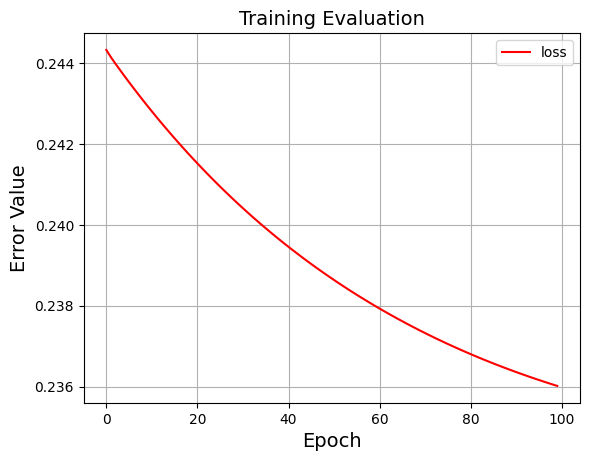

In [11]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [12]:
predictions = model(x)

predictions

tensor([[0.5885, 0.4246],
        [0.5885, 0.4246],
        [0.5885, 0.4246],
        ...,
        [0.5885, 0.4246],
        [0.5885, 0.4246],
        [0.5885, 0.4246]], device='cuda:0', grad_fn=<SigmoidBackward0>)